# Individual Assignment - Week 5

## Individual Assignment - Data Visualization

### Joshua Dollison
### CIS591-86718
### 9/30/2025

### 1. GreenTote Unit Sales v Temperature

The correlation between the sales performance of GreenTote and the temperature, using the data provided in the second assignment

#### Load the data from week 2

In [1]:
import calendar
import pandas as pd

# Load month names from calendar - shows for
months = []
for month_num in range(1, 13):
    months.append(calendar.month_name[month_num])

# Temperatures (°F)
temperature = [40, 45, 55, 65, 75, 85, 90, 88, 86, 80, 70, 60]

# GreenTote sales
green_tote = [
    87500, 100625, 115725, 132075, 148875, 164500,
    172725, 185800, 180900, 170000, 165000, 160000
]

# Create DataFrame 
df = pd.DataFrame({
    'month': months,
    'temp': temperature,
    'sales': green_tote
})

display(df)

,month,temp,sales
0,January,40,87500
1,February,45,100625
2,March,55,115725
3,April,65,132075
4,May,75,148875
5,June,85,164500
6,July,90,172725
7,August,88,185800
8,September,86,180900
9,October,80,170000


#### Build our chart (FORKS UP!)

In [2]:
import plotly.graph_objects as go
import numpy as np
from scipy.stats import pearsonr

# Fit the regression line
slope, intercept = np.polyfit(df['temp'], df['sales'], 1)
x_line = np.linspace(df['temp'].min(), df['temp'].max(), 100)
y_line = slope * x_line + intercept

# Compute Pearson correlation
r_value, p_value = pearsonr(df['temp'], df['sales'])

# Plot a scatter plot in ASU blackout colors!
fig = go.Figure()

# Scatter plot points
fig.add_trace(go.Scatter(
    x=df['temp'],
    y=df['sales'],
    mode='markers+text',
    text=df['month'],
    textposition='top center',
    name='Monthly Data',
    marker=dict(
        size=10,
        color='#8C1D40',  # ASU Maroon
        line=dict(width=2, color='#FFC627')  # ASU Gold border
    )
))

# Add the calculated regression trend line
fig.add_trace(go.Scatter(
    x=x_line,
    y=y_line,
    mode='lines',
    name='Trendline (Linear Regression)',
    line=dict(color='#FFC627', width=3, dash='dash')  # ASU Gold, dashed
))

# show pearson results
fig.add_annotation(
    xref='paper', yref='paper',
    x=0.01, y=0.95,
    text=f"Pearson r = {r_value:.3f}, p = {p_value:.6f}",
    showarrow=False,
    font=dict(size=14, color='#FFC627'),
    bgcolor="#8C1D40",
    bordercolor="#FFC627",
    borderwidth=1,
    borderpad=4
)

# add details and render
fig.update_layout(
    title='Green Tote Sales vs Temperature (with Trendline & Pearson Correlation)',
    xaxis_title='Temperature (°F)',
    yaxis_title='Green Tote Sales',
    height=600,
    paper_bgcolor='#191919',
    plot_bgcolor='#2E2E2E',
    font=dict(family='Arial', size=14, color='#FFC627'),
    title_font=dict(size=22, color='#8C1D40'),
    xaxis=dict(
        color='#FFC627',
        gridcolor='#444',
        zerolinecolor='#8C1D40',
    ),
    yaxis=dict(
        color='#FFC627',
        gridcolor='#444',
        zerolinecolor='#8C1D40',
    ),
    hovermode='closest'
)

fig.show()

### 2. Sentiment - Categorical Comparison

The number of customer reviews and the percentages in each of the three categories: positive, neutral, and negative

#### Load our data from last week (this will file will be uploaded with this notebook)

In [3]:
df = pd.read_csv('DOLLISON_JOSHUA_sentiment.csv')
df

,Unnamed: 0,review,gpt_sentiment,rating,score,sentiment
0,0,I expected better quality for the price; not w...,Negative,1,0.3036,positive
1,1,It cleans easily after outdoor adventures; a b...,Positive,5,0.5859,positive
2,2,Handles are uncomfortable and dig into my hands.,Negative,1,-0.3818,negative
3,3,Lightweight and easy to carry during hikes and...,Positive,5,0.4404,positive
4,4,The handles are sturdy and comfortable to hold.,Positive,5,0.5106,positive
...,...,...,...,...,...,...
495,495,I appreciate the sustainable materials used; v...,Positive,5,0.6801,positive
496,496,The eco-friendly claim seems questionable; no ...,Negative,1,-0.5267,negative
497,497,The eco-friendly claim seems questionable; no ...,Negative,1,-0.5267,negative
498,498,The eco-friendly claim seems questionable; no ...,Negative,1,-0.5267,negative


#### Render our visualizations.

I felt like a bar chart best represented the counts.  The instructions specifically said "number of", so I included the total reviews in the title of the bar subplot.

I felt like a pie chart best represented the percentage views.

In [4]:
import plotly.graph_objects as go
import pandas as pd

sentiment_counts = df['sentiment'].value_counts().reindex(['positive', 'neutral', 'negative'], fill_value=0)
#display(sentiment_counts)

# Let's show the counts as bars
#   Since there are only 3 categories, we'll provide some custom indicator colors
bar = go.Bar(
    x=sentiment_counts.index,
    y=sentiment_counts.values,
    marker_color=['green', 'gray', 'red'],
    text=sentiment_counts.values,
    name="Counts"
)

# We'll show the percentages as a pie chart
pie = go.Pie(
    labels=sentiment_counts.index,
    values=sentiment_counts.values,
    marker=dict(colors=['green', 'gray', 'red']),
    textinfo='percent+label',
    hole=0.4,  # donut style
    name="Percents"
)

# Combine into subplots
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'xy'}, {'type':'domain'}]],
                    subplot_titles=(f'Sentiment Counts - {len(df)} Total Reviews', 'Sentiment Percentages')) # i include a total count here

fig.add_trace(bar, row=1, col=1)
fig.add_trace(pie, row=1, col=2)

fig.update_layout(
    title_text='Customer Sentiment - Categorical Comparison',
    plot_bgcolor='white',
    paper_bgcolor='white',
    showlegend=False
)

fig.show()

### 3. Sentiment - Review Deep Dive

Three word clouds of customers' reviews from three categories: positive, neutral, and negative

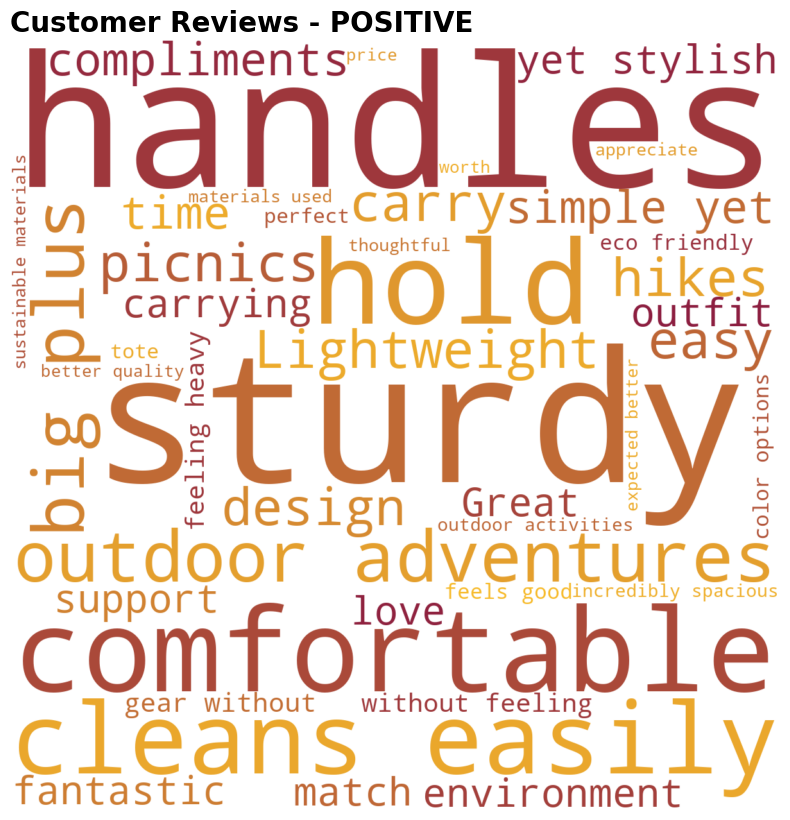

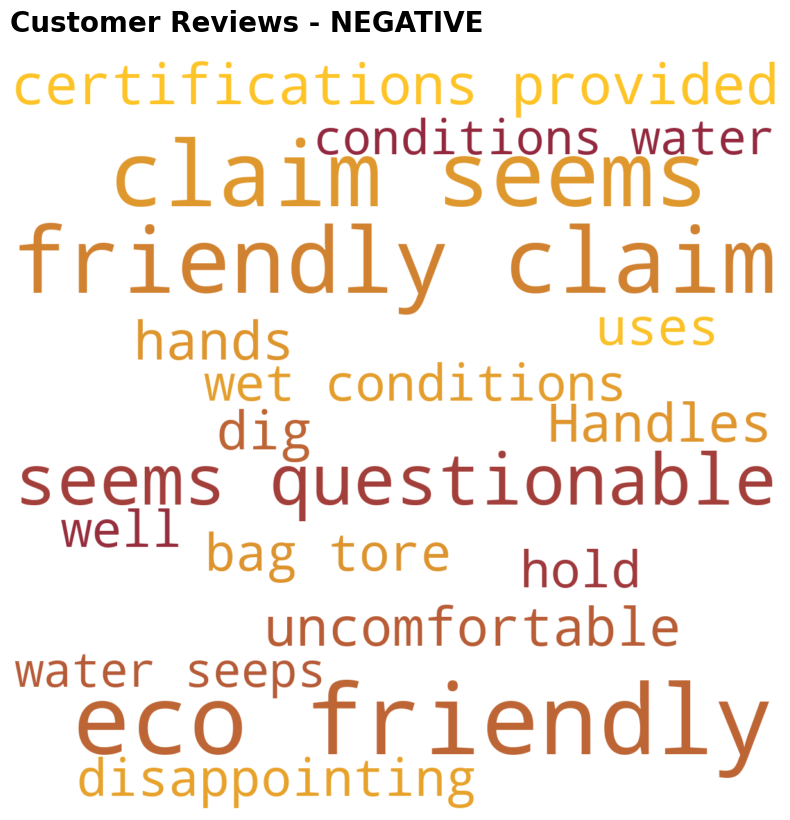

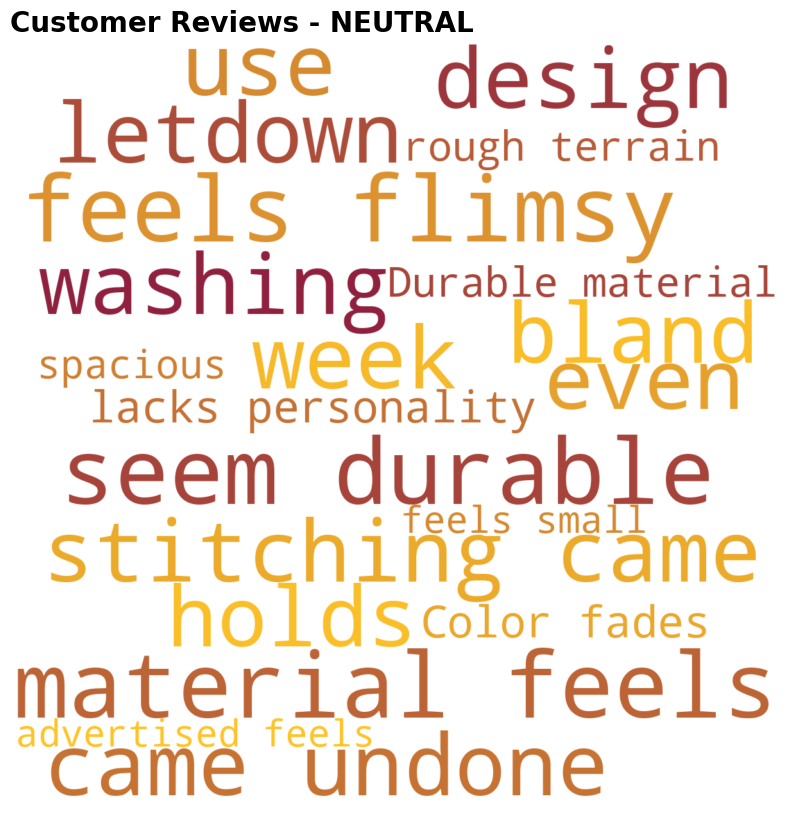

In [5]:
#!pip install wordcloud matplotlib
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# i created a custom function that i can call multiple times
def generateWordCloud(df, sentiment) :

    # pull the right text for the sentiment - concatenate the entire category into one big text string
    text = df[df['sentiment'] == sentiment]['review'].str.cat(sep=' ')
    
    # asu colors
    asu_cmap = LinearSegmentedColormap.from_list("asu_colors", ['#8C1D40', '#FFC627'])
    
    # Generate the Word Cloud
    wordcloud = WordCloud(width=1200, height=1200, background_color='white',
                         colormap=asu_cmap, contour_color='#8C1D40',
                            contour_width=2).generate(text)
    
    # Visualize the Word Cloud using Matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Customer Reviews - {str.upper(sentiment)}', fontsize=20, fontweight='bold', loc='left')
    plt.show()

# loop through each unique sentiment in the df
for sentiment in df['sentiment'].unique() :
    generateWordCloud(df, sentiment)